# Automation and scripting with Python
In this lab, you will deepen your understanding of Python automation and scripting by integrating with an external API, automating data analysis and visualization tasks, and utilizing version control (Git) for efficient project management.

### Tips for completing this lab
As you navigate this lab, keep the following tips in mind:
- `### YOUR CODE HERE ###` indicates where you should write code. Be sure to replace this with your own code before running the code cell.
- Feel free to open the hints for additional guidance as you work on each task.
- You can save your work manually by clicking the save button (floppy disk icon) on the menu bar at the top of the notebook.
- You can also download your work locally by clicking File and then 'Download as' on the menu bar at the top of the notebook, and then specifying your preferred file format (e.g. Notebook (.ipynb)).


## Scenario
You are a Python developer tasked with gathering sports betting and baseball statistics. You will load a CSV file to a DataFrame, perform some analysis, and generate visualizations, as you have done in previous material. After the data is processed, you will set up SendGrid to send an email to your supervisor (using the sample code you've obtained from the SendGrid documentation). This is designed to send an alert once your analysis is done. You will add your API key and configure the message. 

You will add scheduling to a program so that the analysis is run every day and the automated email will be sent after completion of the analysis, and you will use file operations to save your DataFrame, ensuring you do not overwrite the previous set of data. As you do this, you will add logging messages where appropriate.

As you progress through this lab, you will use Git to manage your project and commit regularly.

## High-Level Tasks
1. **Set up Version Control** using Git.
2. **Data Handling and Preprocessing** of the sports dataset.
3. **Visualization Building and Evaluation** with Python libraries.
4. **API Integration and Error Handling** to set up alert emails and handle cases where the API integration fails.
5. **Scheduling** to automate sending an email on a schedule.
6. **File Operations  Logging** to save and rename files, and logging info-level messages.

### 1. Set Up Version Control
#### Step 1.1: Initialize Git
Initialize a local Git repository for this project where you can store versions of this notebook. This will allow you to track your progress, make commits, and revert changes when needed. 

You can download your work locally by clicking File and then 'Download as' on the menu bar at the top of the notebook, and then specifying your preferred file format (e.g. Notebook (.ipynb)).

In [1]:
# Initialize a Git repository
git init

# Add all the files to staging
git add .

# Commit the changes
git commit -m "Initial commit for the automation and scripting project"

SyntaxError: invalid syntax (421311608.py, line 2)

#### Step 1.2: Make Regular Commits
Ensure that you commit your changes regularly using descriptive commit messages.

In [ ]:
# Example of a commit after completing a section
git commit -am "Added data handling and preprocessing steps"

### 2. Data Handling and Preprocessing
#### Step 2.1: Load the Dataset
Load the provided sports dataset **sports_data_missing.csv** into a pandas DataFrame and inspect it to understand the structure, missing values, and any inconsistencies.

In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sports_data_missing.csv")# YOUR CODE HERE - load sports_data_missing CSV file into the DataFrame

# Display the first few rows
#print(df.head())

pd.set_option('display.max_rows', 50)
print(df)
# Check for missing values and data types
print(df.info())

                 Name      G     AB      H    RBI  Singles  Doubles  Triples  \
0    Stacey Davenport  122.0  325.0  290.0  218.0     26.0     35.0     10.0   
1       Julie Mahoney  101.0  545.0  535.0   19.0    508.0      4.0      1.0   
2         Amber David  156.0  508.0  482.0  296.0     42.0     92.0     13.0   
3     Patricia Moreno  157.0  338.0  323.0   24.0    131.0     16.0     61.0   
4        Chris Morris  124.0  427.0  215.0  177.0     21.0     11.0      0.0   
..                ...    ...    ...    ...    ...      ...      ...      ...   
995   Benjamin Rivera  112.0  314.0  309.0   20.0    252.0     32.0      4.0   
996         Norma Cox  146.0  342.0  102.0   26.0     46.0     10.0      0.0   
997        Susan Tran  106.0  500.0  405.0  249.0      9.0     37.0     23.0   
998     Rhonda Daniel  112.0  494.0  271.0  130.0     96.0     28.0     11.0   
999    Frank Anderson  121.0  327.0  316.0  171.0    132.0     11.0      2.0   

        HR     SO     BB  
0    219.0  

#### Step 2.2: Clean and Preprocess the Data
Check for missing or invalid values, and clean the dataset as needed (e.g., fill missing values, handle data inconsistencies). In this case, drop any columns with invalid data.

In [21]:
# Drop rows with invalid data
# YOUR CODE HERE

print(df.isnull().sum())
#df.iloc[605:611]
print(df[df.isnull().any(axis=1)])

df_cleaned = df.dropna(how='all')


#Inspect the cleaned data


index_to_drop = [605, 606, 607, 608, 609, 610, 611]
df_cleaned = df.drop(index=index_to_drop)

print(df.info())
print(df_cleaned.shape)


Name       0
G          7
AB         7
H          7
RBI        7
Singles    7
Doubles    7
Triples    7
HR         7
SO         7
BB         7
dtype: int64
                  Name   G  AB   H  RBI  Singles  Doubles  Triples  HR  SO  BB
605  Tyler Townsend MD NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
606    Cassandra Brock NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
607   Elizabeth Harris NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
608      James Edwards NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
609      Andrew Garcia NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
610        James Baker NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
611    Whitney Wallace NaN NaN NaN  NaN      NaN      NaN      NaN NaN NaN NaN
          Singles     Doubles     Triples          HR
count  993.000000  993.000000  993.000000  993.000000
mean    67.330312   34.226586   17.120846  151.946626
std     74.289658   45.547985   29.402029  102.427

### 3. Visualization Building and Evaluation
#### Step 3.1: Create Functions for Visualizations
Create a function to generate different visualizations based on the dataset. For example, scatter plots showing player statistics. Please note these abbreviations:
- HR = Home Runs
- BB = Walks (Base on Balls)
- SO = Strikeouts
- AB = At Bats

Some common examples of baseball metrics are a comparison of how many strikeouts (SO) vs. walks (BB), and number of at bats (AB) vs. home runs (HR). Create two scatter plots, one showing the Walk vs. Strikeout Ratio, and the second showing Home Runs vs. At Bats ratio.

Create a function called create_scatter_plot that accepts the dataframe, the x and y column names, and the chart title, and generates and displays a scatter plot.

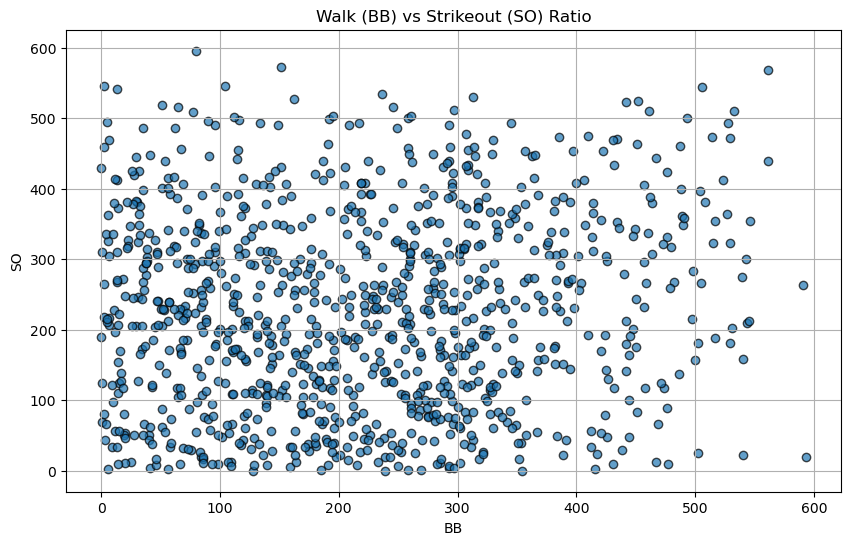

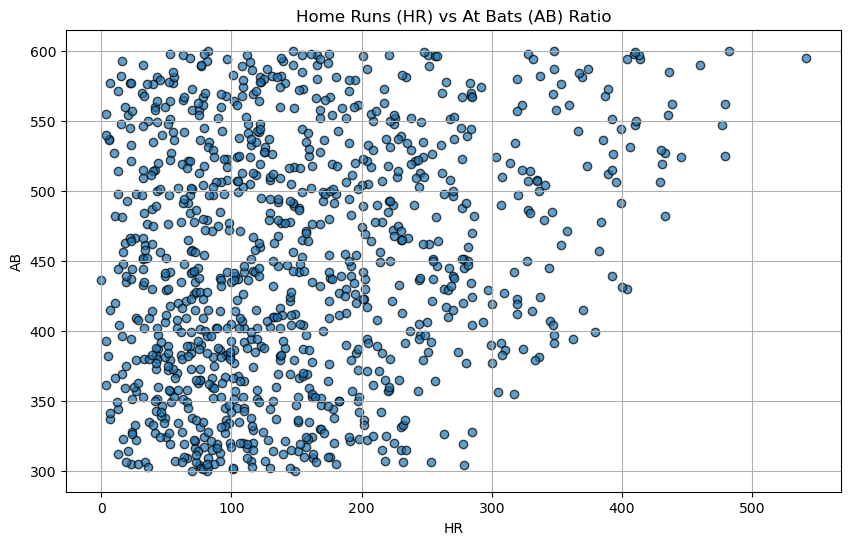

In [13]:
import matplotlib.pyplot as plt

# Function to create scatter plot
def create_scatter_plot(df, x_col, y_col, title):
    plt.figure(figsize = (10, 6)) # Figure size is provided
    
    # YOUR CODE HERE - Make the plot a scatter plot with the DataFrame's x_col and y_col as parameters
    plt.scatter(df[x_col], df[y_col], alpha=0.7, edgecolors='black')
    
    # YOUR CODE HERE - Set the plot title to the title parameter
    plt.title(title)
    
    # YOUR CODE HERE - Set the x_label to the x_col parameter
    plt.xlabel(x_col)
    
    # YOUR CODE HERE - Set the y_label to the y_col parameter
    plt.ylabel(y_col)
    
    # YOUR CODE HERE - # Switch gridlines on (True)
    plt.grid(True)
    plt.show()

# Example usage
create_scatter_plot(df, 'BB', 'SO', 'Walk (BB) vs Strikeout (SO) Ratio')
create_scatter_plot(df, 'HR', 'AB', 'Home Runs (HR) vs At Bats (AB) Ratio')

#### Step 3.2:  Create a box plot
Use Matplotlib to generate a box plot with singles, doubles, triples, and home runs. The X label should be Hits and the Y label should be Hit Type. The title should be Distribution of Hits.

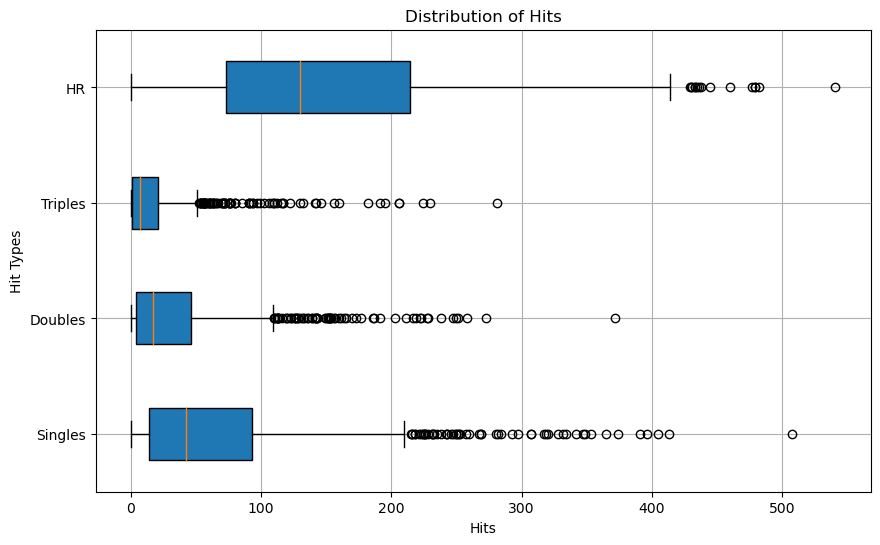

'\nplt.boxplot(df_cleaned[\'Triples\'].dropna(), vert=False, patch_artist=True)\nplt.xlabel("HR Hits")\nplt.title("Box Plot for HR")\nplt.grid(True)\nplt.show()\n'

In [29]:
# Create box plots using Matplotlib
plt.figure(figsize = (10, 6)) # Figure size is provided

# Set up data to contain the Singles, Doubles, Triples, and Home Runs from the DataFrame "df"
#data = [df['Singles'], df['Doubles'], df['Triples'], df['HR']] # YOUR CODE HERE

data = [df_cleaned['Singles'].dropna().tolist(), 
        df_cleaned['Doubles'].dropna().tolist(), 
        df_cleaned['Triples'].dropna().tolist(), 
        df_cleaned['HR'].dropna().tolist()]

# Create the boxplot with specified options
plt.boxplot(data, vert=False, patch_artist=True) # Code is provided

plt.yticks(range(1, 5), ['Singles', 'Doubles', 'Triples', 'HR']) # Code is provided

# YOUR CODE HERE - set xlabel to Hits
plt.xlabel("Hits")

# YOUR CODE HERE - set xlabel to Hit Type
plt.ylabel("Hit Types")

# YOUR CODE HERE - set title to Distribution of Hits
plt.title("Distribution of Hits")

# YOUR CODE HERE - # Switch gridlines on (True)
plt.grid(True)
plt.show()
"""
plt.boxplot(df_cleaned['Triples'].dropna(), vert=False, patch_artist=True)
plt.xlabel("HR Hits")
plt.title("Box Plot for HR")
plt.grid(True)
plt.show()
"""

#### Step 3.3:  Calculate averages and remove outliers
Remove all players with 0 walks or 0 strikeouts, and create a new column "SO/BB" that calculates the strikeout to walk ratio. Calculate the mean singles, doubles, triples, home runs (HR), and the minimum and maximum strikeout-to-walk ratio (SO/BB) from the column created in this step.

In [33]:
"""# Remove players with 0 walks from DataFrame
df = df[df["BB"] > 0]

# Remove players with 0 Strikeouts from DataFrame
df = df[df["Strikeouts"] > 0]

# Create column with Strikeout/Walk Ratio %
df["SO/BB"] = (df["Strikeouts"] / df["BB"]) * 100  # Converts ratio to percentage

# Use DataFrame functionality to calculate the mean of the fields below
average_singles = df["Singles"].mean()
average_doubles = df["Doubles"].mean()
average_triples = df["Triples"].mean()
average_hr = df["HR"].mean()

# Use DataFrame functionality to calculate the max and min of the strikeout to walk ratio
max_SO_BB = df["SO/BB"].max()
min_SO_BB = df["SO/BB"].min()
"""


# Remove players with 0 walks ("BB") or 0 strikeouts ("SO")
df_cleaned = df[(df["BB"] > 0) & (df["SO"] > 0)]

# Create the SO/BB ratio column (Strikeouts per Walk, converted to a percentage)
df_cleaned["SO/BB"] = (df_cleaned["SO"] / df_cleaned["BB"]) * 100  # Percentage representation

# Calculate the mean values for Singles, Doubles, Triples, and Home Runs
average_singles = df_cleaned["Singles"].mean()
average_doubles = df_cleaned["Doubles"].mean()
average_triples = df_cleaned["Triples"].mean()
average_hr = df_cleaned["HR"].mean()

# Find the maximum and minimum SO/BB ratio
max_SO_BB = df_cleaned["SO/BB"].max()
min_SO_BB = df_cleaned["SO/BB"].min()


In [34]:
# Checking Your Results:
print(f"Singles: {average_singles}")
print(f"Doubles: {average_doubles}")
print(f"Triples: {average_triples}")
print(f"Home Runs: {average_hr}")
print(f"Max SO/BB Ratio: {max_SO_BB}")
print(f"Min SO/BB Ratio: {min_SO_BB}")

Singles: 67.43522267206478
Doubles: 34.050607287449395
Triples: 17.13157894736842
Home Runs: 151.97672064777328
Max SO/BB Ratio: 31100.0
Min SO/BB Ratio: 0.37174721189591076


### 4. API Integration and Error Handling
Now that you have successfully set up your analysis, the next step you want to take is to email your supervisor when the analysis is complete. To do so, you have decided to use SendGrid to send the email. For now, we will use a non-functioning API key, but the steps to apply for a functional one are outlined in step 4.1.
#### (optional) Step 4.1: Set Up SendGrid API Account
1. **Create a SendGrid Account:** Visit [SendGrid](https://sendgrid.com/) and create a free account by visiting the website and clicking Start for Free.

2. **Obtain API Key:** After signing in, navigate to the API keys section in the dashboard and generate a new API key. Store this key in a secure place

#### Step 4.2: Install SendGrid library
To ensure you have the required SendGrid library, enter the command: `pip install sendgrid`

As has been the case with other projects in the past, the installation only needs to be done once per machine.

In [ ]:
pip install sendgrid

#### Step 4.3 Use the SendGrid API to Send Alerts
Once you have your SendGrid API key, integrate it into your Python script to send email alerts. Here, you will need to bring in your API key. You are using the basic email code snippet provided by SendGrid. The main things you will need to change are bringing in your API key and configuring the message. 

For the purposes of this exercise, you will be provided with a (non-functioning) SendGrid API key. In general, API keys are alphanumeric strings ranging from 20 to 128 characters and are case sensitive. The ones provided by SendGrid are 69 characters.

Assume for this exercise your API key is: `F4kG7dL9pM2aB5nR8eJ1cK6oI3hN4gD5qE6fT7yU8wX9zA0bC1vM2aB5nR8eJ1cK6oI3h`

The email should have the following characteristics.
- Your email: `admin@example.com`
- Supervisor's email: `rshah@example.com`
- Subject: `Analysis completed for today`
- Message (plain text): `Baseball analysis is completed for today. Please view the statistics_CURRENT.csv to review details.`

Insert your API key in the code below, and adjust the code to set up the email message. You will schedule the email in a future step. Ensure the arguments in the mail generation are separated by commas.

In [ ]:
import sendgrid
from sendgrid.helpers.mail import Mail
import logging

# Set up SendGrid API credentials
SENDGRID_API_KEY = 'sendgrid_api_key' # Replace with your API Key

sg = sendgrid.SendGridAPIClient(SENDGRID_API_KEY)

message = Mail(
    from_email = # YOUR CODE HERE - Add your 'from' email address 
    to_emails = # YOUR CODE HERE - Add the 'to' email address
    subject = # YOUR CODE HERE -  Add subject
    plain_text_content = # YOUR CODE HERE - Add content
)

In [ ]:
# Checking Your Results

#### Step 4.4: Log success or failure
Now that you have set up the email using SendGrid, you want to send the message. SendGrid will respond with a successful status code or an exception. Here, add an logging info message saying `Email Sent Successfully` when the message is sent. If there is an exception, add a logging info message saying `Email Message Failure`.

Assume the logging library is imported and you can reference the method by using `logging.info`.

Given you are using a non-functioning API key, running this code should result in an failure message.

In [ ]:
try:
    response = sg.send(message)
    # YOUR CODE HERE Add a logging info level print statement
    
except Exception as e:
    # YOUR CODE HERE Add a logging info here

In [ ]:
# Checking Your Results

### 5. Scheduling
#### Step 5.1: Automate Tasks with a Schedule
Use the `schedule` library to automate tasks like updating data, generating visualizations, and sending alerts. Assume you have an `email_message` function designed. Your task is to schedule the task to run every day at 9 AM. 

In [ ]:
pip install schedule

In [ ]:
import schedule
import time

# Mock function for emailing a message. Call this function using schedule below.
def email_message():
    pass

# Schedule the job to run every day at 9 AM
# YOUR CODE HERE

In [ ]:
# Checking Your Results

### 6. File Operations and Logging 
Managing files on storage is important, whether it is in a database or in a file. In some cases, you may need to move files around. In your example, instead of overwriting a file, you will want to make a backup of the previous file. Here, you will want to keep two versions of your file, the current version and the previous version, and log any file operations.
#### Step 6.1: Manipulate project files
Your next task is to save your data and also log the results. Here is your plan.
1. You want to see if statistics_CURRENT.csv exists. If it does:

    a. If it exists, delete the file statistics_OLD.csv (and log an info message that you have done it)
    
    b. Rename statistics_CURRENT.CSV to statistics_OLD.csv (and log an info message that you have done it)
    
    
2. Convert the data frame to a CSV and save it as statistics_CURRENT.csv (and log an info message that you have done it).

In [ ]:
import os
import logging

# File names
current_file = 'statistics_CURRENT.csv'
old_file = 'statistics_OLD.csv'

# Check if the file exists
if # YOUR CODE HERE:
    # Delete the old file
    if # YOUR CODE HERE
        # YOUR CODE HERE - use os library to delete old_file
        # YOUR CODE HERE - log an info message "Deleted old backup"
        
    # Rename the current file to old
    # YOUR CODE HERE - Rename current_file to old file using os library
    # YOUR CODE HERE - log an info message "Backed up current file"
    
# Save the DataFrame to the new CSV file
df.to_csv(current_file, index=False)
# YOUR CODE HERE - Log an info message "Statistics written to file"

In [ ]:
# Checking Your Results

### Hints & Tips
- Use meaningful commit messages to track your progress.
- In real world applications, you’ll want to ensure that your API credentials are stored securely (e.g., using environment variables).
- Test the automation script before scheduling it to run periodically.

#### End of Lab
By completing this lab, you’ve gained experience in building automated solutions for data analysis and visualization. You’ve learned how to integrate libraries and APIs and managed the project using Git. These real-world skills are in high demand in many fields including software engineering and data analysis!